In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('images/extended_data_1b.csv', sep='\t')
df

,# of heavy atoms,Time spent (DFT),Time spent (LACL)
0,9,304.454,0.10351
1,9,420.567,0.09633
2,9,352.072,0.08399
3,9,269.922,0.07895
4,9,356.496,0.05925
5,8,135.704,0.07369
6,8,304.238,0.09655
7,8,223.168,0.03477
8,8,152.328,0.03752
9,8,220.253,0.08338


In [3]:
time_spent_dft = {i:[] for i in range(1, 10)}
time_spent_lacl = {i:[] for i in range(1, 10)}
for i, row in df.iterrows():
    time_spent_dft[int(row['# of heavy atoms '])].append(row['Time spent (DFT)'])
    time_spent_lacl[int(row['# of heavy atoms '])].append(row['Time spent (LACL)'])

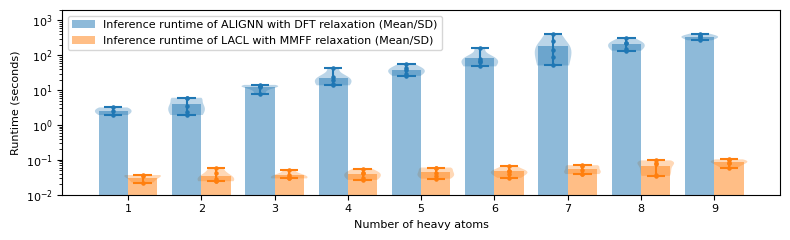

In [20]:
x = np.arange(1, 10)
y = [np.mean(time_spent_dft[i]) for i in range(1, 10)]
yerr = [np.std(time_spent_dft[i]) for i in range(1, 10)]
z = [np.mean(time_spent_lacl[i]) for i in range(1, 10)]
zerr = [np.std(time_spent_lacl[i]) for i in range(1, 10)]

plt.figure(figsize=(8, 2.5))
fontdict = {'fontsize':8}

plt.violinplot([time_spent_dft[i] for i in range(1, 10)], positions=np.arange(1, 10)-0.2)
plt.violinplot([time_spent_lacl[i] for i in range(1, 10)], positions=np.arange(1, 10)+0.2)
plt.bar(x-0.2, y, 0.4, capsize=3, label='Inference runtime of ALIGNN with DFT relaxation (Mean/SD)', alpha=0.5)
plt.bar(x+0.2, z, 0.4, capsize=3, label='Inference runtime of LACL with MMFF relaxation (Mean/SD)', alpha=0.5)
plt.scatter(df['# of heavy atoms ']-0.2, df['Time spent (DFT)'], s=5, c='tab:blue')
plt.scatter(df['# of heavy atoms ']+0.2, df['Time spent (LACL)'], s=5, c='tab:orange')
plt.yscale('log')
plt.xlabel('Number of heavy atoms', fontdict=fontdict)
plt.ylabel('Runtime (seconds)', fontdict=fontdict)
plt.xticks(x, fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylim(0.01,2000)
plt.legend(prop={'size': 8}, loc='upper left')
plt.tight_layout()
plt.savefig('images/extended_data_1b.pdf', dpi=500, format='pdf', transparent=True)
plt.savefig('images/extended_data_1b.tif', dpi=500, format='tif', transparent=True)